In [1]:
import sys
from pathlib import Path
from os import getcwd
sys.path.append(str(Path(getcwd()).parent))

from datetime import date, timedelta
import codecs
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

from os.path import join

from bulletin import default_input, default_output
from bulletin.services.metabase import Metabase
from bulletin.systems.casos_confirmados import CasosConfirmados
from bulletin.systems.notifica import Notifica
from bulletin.utils.static import Municipios
from bulletin.utils.normalize import normalize_hash, normalize_labels, normalize_text, date_hash, normalize_number
from bulletin.utils import static
from bulletin.utils.xls_ import fit_cols

from datetime import datetime


today = datetime.today()
ontem = today - timedelta(1)
anteontem = ontem - timedelta(1)


---------------------------------------------------------------

root: C:\sesa\dev\bulletin
parent: C:\sesa\dev
default_input: C:\sesa\dev\input
default_output: C:\sesa\dev\output

---------------------------------------------------------------



In [2]:
municipios = Municipios()
municipios['mun_resid'] = municipios['municipio'].apply(normalize_text)
municipios.loc[municipios['uf']!='PR','mun_resid'] = municipios.loc[municipios['uf']!='PR','municipio'].apply(normalize_text) + '/' + municipios['uf']

In [3]:
# mb = Metabase()

In [4]:
# mb.generate_notifica_query('query_linda')

In [5]:
# mb.list_sql_files()

In [3]:
# notifica = mb.download_notificacao('query_linda')
notifica = Notifica()
notifica.load()
# notifica.save()
casos_notifica = notifica.df
# casos_notifica.tail()

In [4]:
faixa_etaria = [0,10,20,30,40,50,60,70,80,90,100]
faixa_etaria_labels = ['err','0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','>=100']
casos_notifica['faixa_etaria'] = [ faixa_etaria_labels[idx] for idx in np.digitize(casos_notifica['idade'],faixa_etaria,right=False)]
# casos_notifica.groupby('faixa_etaria')[['id']].count().plot(kind='bar')

In [5]:
# casos_notifica.loc[casos_notifica.duplicated('hash',keep=False)].sort_values('hash')
# casos_notifica = casos_notifica.drop_duplicates('hash',keep=False)
# casos_notifica = casos_notifica.drop_duplicates('hash_atend',keep=False)
casos_notifica.loc[casos_notifica['data_liberacao'].notna(),'hash_diag'] = casos_notifica.loc[casos_notifica['data_liberacao'].notna(),'paciente'].apply(normalize_hash) + casos_notifica.loc[casos_notifica['data_liberacao'].notna(),'data_liberacao'].apply(date_hash)
casos_notifica.tail()

,id,data_notificacao,data_encerramento,status_notificacao,origem,updated_at,numero_do,classificacao_final,criterio_classificacao,evolucao,data_cura_obito,tipo_paciente,cns,cpf,passaporte,etnia,paciente,sexo,data_nascimento,nome_mae,raca_cor,ocupacao,ocupacao_descricao,cod_cbo,escolaridade,pais_residencia,pais_municipio_residencia,uf_residencia,ibge_residencia,cep_residencia,logradouro_residencia,bairro_residencia,uf_unidade_notifica,ibge_unidade_notifica,data_cadastro,data_coleta,data_recebimento,data_liberacao,requisicao,resultado,exame,metodo,lab_executor,data_1o_sintomas,data_diagnostico,idade,hash,hash_atend,hash_less,hash_more,hash_mae,hash_nasc,faixa_etaria,hash_diag
70487,4240318,2021-06-14,NaT,1.0,1.0,2021-06-14,None,2.0,1.0,3.0,NaT,3.0,704803528170441,10752663941,NaN,NaN,ANA PAULA GIMENES MAGALHAES,2.0,1996-07-14,APARECIDA GIMENES MAGALHAES,99.0,5.0,BANHISTA,NaN,NaN,1.0,,41,412550,83060386,Rua Mário Tomelim,Guatupê,41,412550,2021-06-14,2021-06-14,NaT,NaT,-1,12.0,167,2,,2021-06-08,2021-06-14,24,ANAPAULAGIMENESMAGALHAES24412550,ANAPAULAGIMENESMAGALHAES24412550,ANAPAULAGIMENESMAGALHAES23412550,ANAPAULAGIMENESMAGALHAES25412550,ANAPAULAGIMENESMAGALHAESAPARECIDAGIMENESMAGALHAES,ANAPAULAGIMENESMAGALHAES14071996,20-29,NaN
70488,4240321,2021-06-14,NaT,1.0,1.0,2021-06-14,None,2.0,1.0,3.0,NaT,3.0,709604605393377,03146550938,NaN,NaN,KATIA CILENE DE SOUZA SILVA,2.0,1976-08-28,MARIA CELIA DE SOUZA,99.0,NaN,,NaN,NaN,1.0,,41,411520,87103232,Rua Yruama,Conjunto Residencial João Paulo I (Iguatemi),43,431410,NaT,NaT,NaT,NaT,-1,12.0,167,2,FARMACIA SAO JOAO,NaT,2021-06-14,44,KATIACILENEDESOUZASILVA44411520,KATIACILENEDESOUZASILVA44431410,KATIACILENEDESOUZASILVA43411520,KATIACILENEDESOUZASILVA45411520,KATIACILENEDESOUZASILVAMARIACELIADESOUZA,KATIACILENEDESOUZASILVA28081976,40-49,NaN
70489,4240323,2021-06-14,NaT,1.0,1.0,2021-06-14,None,2.0,1.0,3.0,NaT,3.0,704101662044050,10449381960,NaN,NaN,YASMIM GRASIELE SANTOS,2.0,1999-10-01,GRASIELE CABRAL RIBEIRO DA SILVA,99.0,NaN,,NaN,NaN,1.0,,41,411750,87140000,AV IVAI,CENTRO,41,411750,NaT,NaT,NaT,NaT,-1,12.0,167,2,,2021-06-11,2021-06-14,21,YASMIMGRASIELESANTOS21411750,YASMIMGRASIELESANTOS21411750,YASMIMGRASIELESANTOS20411750,YASMIMGRASIELESANTOS22411750,YASMIMGRASIELESANTOSGRASIELECABRALRIBEIRODASILVA,YASMIMGRASIELESANTOS01101999,20-29,NaN
70490,4240340,2021-06-14,NaT,1.0,1.0,2021-06-14,None,2.0,1.0,3.0,NaT,3.0,701804286663278,10060231947,NaN,NaN,BRUNO VINICIUS CANCELIERI,1.0,1995-06-06,CLEIDE LIMA GREGO CANCELIERI,1.0,NaN,,NaN,NaN,1.0,,41,410990,87530000,AV AFONÇO MEIRA,CENTRO,41,410990,2021-06-14,2021-06-14,2021-06-14,2021-06-14,-1,12.0,167,2,MULT-TEST,2021-06-12,2021-06-14,26,BRUNOVINICIUSCANCELIERI26410990,BRUNOVINICIUSCANCELIERI26410990,BRUNOVINICIUSCANCELIERI25410990,BRUNOVINICIUSCANCELIERI27410990,BRUNOVINICIUSCANCELIERICLEIDELIMAGREGOCANCELIERI,BRUNOVINICIUSCANCELIERI06061995,20-29,BRUNOVINICIUSCANCELIERI14062021
70491,4240348,2021-06-14,NaT,1.0,1.0,2021-06-14,None,2.0,1.0,3.0,NaT,3.0,703008840582974,None,NaN,NaN,CARLOS ALBERTO HIPOLITO,1.0,1968-07-01,MARIA MADALENA HIPOLITO,99.0,5.0,agricultor,6220.0,NaN,1.0,,41,411410,87160000,estrada pulinopolis,sitio santa fe,43,431410,NaT,NaT,NaT,NaT,-1,12.0,167,2,FARMACIA SAO JOAO,NaT,2021-06-14,52,CARLOSALBERTOHIPOLITO52411410,CARLOSALBERTOHIPOLITO52431410,CARLOSALBERTOHIPOLITO51411410,CARLOSALBERTOHIPOLITO53411410,CARLOSALBERTOHIPOLITOMARIAMADALENAHIPOLITO,CARLOSALBERTOHIPOLITO01071968,50-59,NaN


In [9]:
# schema = notifica.schema
# for group in schema['group_name'].unique():
#     print(f"\n------{group}-------")
#     for col in schema.loc[schema['group_name']==group,'column']:
#         print(f"{col} -> {casosn[col].isna().sum()}")

In [6]:
cc = CasosConfirmados()
cc.load(f"cc_{today.strftime('%d_%m_%Y')}")
casos_confirmados = cc.df
casos_confirmados.tail()

databases: ['cc_11_06_2021', 'cc_15_06_2021']
Load C:\sesa\dev\bulletin\database\casos_confirmados\cc_15_06_2021.pkl
loading Casos Confirmados from pkl time elepsed:00:01:17


,identificacao,id_notifica,uf_resid,ibge_resid,ibge_atend,nome,sexo,idade,laboratorio,dt_diag,comunicacao,is,evolucao,data_evolucao,data_com_evolucao,hash,hash_less,hash_more,hash_atend,hash_less_atend,hash_more_atend,hash_diag
1156342,1248603,4177545.0,PR,411040,411040,ZILDA DE OLIVEIRA,F,50,"COVID-19, Biologia Molecular",2021-06-13,15/06/2021,09/06/2021,3.0,NaT,NaT,ZILDADEOLIVEIRA50411040,ZILDADEOLIVEIRA49411040,ZILDADEOLIVEIRA51411040,ZILDADEOLIVEIRA50411040,ZILDADEOLIVEIRA49411040,ZILDADEOLIVEIRA51411040,ZILDADEOLIVEIRA13062021
1156343,1248604,4142030.0,PR,412630,412630,ZILDE SILVESTRE DOMINGUES,F,68,"COVID-19, Biologia Molecular",2021-06-11,15/06/2021,04/06/2021,3.0,NaT,NaT,ZILDESILVESTREDOMINGUES68412630,ZILDESILVESTREDOMINGUES67412630,ZILDESILVESTREDOMINGUES69412630,ZILDESILVESTREDOMINGUES68412630,ZILDESILVESTREDOMINGUES67412630,ZILDESILVESTREDOMINGUES69412630,ZILDESILVESTREDOMINGUES11062021
1156344,1248605,4190805.0,PR,411660,411660,ZILO CORREA AFONSO,M,47,"COVID-19, Biologia Molecular",2021-06-13,15/06/2021,08/06/2021,3.0,NaT,NaT,ZILOCORREAAFONSO47411660,ZILOCORREAAFONSO46411660,ZILOCORREAAFONSO48411660,ZILOCORREAAFONSO47411660,ZILOCORREAAFONSO46411660,ZILOCORREAAFONSO48411660,ZILOCORREAAFONSO13062021
1156345,1248606,3991427.0,PR,410480,410480,ZILZA AUGUSTA BENTO DOS SANTOS,F,60,Teste Rápido IgG (Imunocromatografia),2021-06-10,15/06/2021,25/05/2021,1.0,2021-06-14 00:00:00,NaT,ZILZAAUGUSTABENTODOSSANTOS60410480,ZILZAAUGUSTABENTODOSSANTOS59410480,ZILZAAUGUSTABENTODOSSANTOS61410480,ZILZAAUGUSTABENTODOSSANTOS60410480,ZILZAAUGUSTABENTODOSSANTOS59410480,ZILZAAUGUSTABENTODOSSANTOS61410480,ZILZAAUGUSTABENTODOSSANTOS10062021
1156346,1248607,4236074.0,PR,411930,411930,ZORILDO JESUS DOS SANTOS,M,42,"COVID-19, Biologia Molecular",2021-06-07,15/06/2021,03/06/2021,1.0,2021-06-03 00:00:00,NaT,ZORILDOJESUSDOSSANTOS42411930,ZORILDOJESUSDOSSANTOS41411930,ZORILDOJESUSDOSSANTOS43411930,ZORILDOJESUSDOSSANTOS42411930,ZORILDOJESUSDOSSANTOS41411930,ZORILDOJESUSDOSSANTOS43411930,ZORILDOJESUSDOSSANTOS07062021


<AxesSubplot:xlabel='dt_diag'>

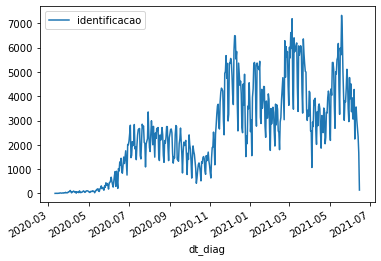

In [7]:
casos_confirmados[['identificacao','dt_diag']].groupby('dt_diag').count().plot()

In [12]:
# casos_confirmados.loc[casos_confirmados.duplicated('hash',keep=False)].sort_values(['nome','id_notifica'])

In [13]:
# casos_confirmados = casos_confirmados.drop_duplicates('hash',keep='first')
# del casos_confirmados['id_notifica']
# casos_confirmados_bkp = casos_confirmados.copy()

In [11]:
# novos_casos_confirmados_hash = pd.merge(casos_confirmados,casos_notifica[['id','hash']].rename(columns={'id':'id_notifica'}), on='hash', how='inner')
# casos_confirmados = casos_confirmados.drop(index=casos_confirmados.loc[casos_confirmados['identificacao'].isin(novos_casos_confirmados_hash['identificacao'])].index.to_list())
# print(len(novos_casos_confirmados_hash))

# novos_casos_confirmados_hash_less = pd.merge(casos_confirmados,casos_notifica[['id','hash']].rename(columns={'id':'id_notifica', 'hash':'hash_less'}), on='hash_less', how='inner')
# casos_confirmados = casos_confirmados.drop(index=casos_confirmados.loc[casos_confirmados['identificacao'].isin(novos_casos_confirmados_hash_less['identificacao'])].index.to_list())
# print(len(novos_casos_confirmados_hash_less))

# novos_casos_confirmados_hash_more = pd.merge(casos_confirmados,casos_notifica[['id','hash']].rename(columns={'id':'id_notifica', 'hash':'hash_more'}), on='hash_more', how='inner')
# casos_confirmados = casos_confirmados.drop(index=casos_confirmados.loc[casos_confirmados['identificacao'].isin(novos_casos_confirmados_hash_more['identificacao'])].index.to_list())
# print(len(novos_casos_confirmados_hash_more))

# novos_casos_confirmados_hash_diag = pd.merge(casos_confirmados,casos_notifica[['id','hash_diag']].rename(columns={'id':'id_notifica'}), on='hash_diag', how='inner')
# casos_confirmados = casos_confirmados.drop(index=casos_confirmados.loc[casos_confirmados['identificacao'].isin(novos_casos_confirmados_hash_diag['identificacao'])].index.to_list())
# print(len(novos_casos_confirmados_hash_diag))

# novos_casos_confirmados_hash_atend = pd.merge(casos_confirmados,casos_notifica[['id','hash_atend']].rename(columns={'id':'id_notifica'}), on='hash_atend', how='inner')
# casos_confirmados = casos_confirmados.drop(index=casos_confirmados.loc[casos_confirmados['identificacao'].isin(novos_casos_confirmados_hash_atend['identificacao'])].index.to_list())
# print(len(novos_casos_confirmados_hash_atend))

# novos_casos_confirmados_hash_atend_less = pd.merge(casos_confirmados,casos_notifica[['id','hash_atend']].rename(columns={'id':'id_notifica', 'hash_atend':'hash_less_atend'}), on='hash_less_atend', how='inner')
# casos_confirmados = casos_confirmados.drop(index=casos_confirmados.loc[casos_confirmados['identificacao'].isin(novos_casos_confirmados_hash_atend_less['identificacao'])].index.to_list())
# print(len(novos_casos_confirmados_hash_atend_less))

# novos_casos_confirmados_hash_atend_more = pd.merge(casos_confirmados,casos_notifica[['id','hash_atend']].rename(columns={'id':'id_notifica', 'hash_atend':'hash_more_atend'}), on='hash_more_atend', how='inner')
# casos_confirmados = casos_confirmados.drop(index=casos_confirmados.loc[casos_confirmados['identificacao'].isin(novos_casos_confirmados_hash_atend_more['identificacao'])].index.to_list())
# print(len(novos_casos_confirmados_hash_atend_more))

# novos_casos_confirmados = pd.concat([novos_casos_confirmados_hash,novos_casos_confirmados_hash_less,novos_casos_confirmados_hash_more,novos_casos_confirmados_hash_diag])
# print(len(novos_casos_confirmados))
# novos_casos_confirmados = novos_casos_confirmados.drop_duplicates('identificacao', keep='first')
# print(len(novos_casos_confirmados))

In [15]:
# novos_casos_confirmados['id_notifica'] = novos_casos_confirmados['id_notifica'].fillna(-1).astype(int)

In [10]:
# casos_sem_notifica = casos_confirmados_bkp.loc[~casos_confirmados_bkp['identificacao'].isin(novos_casos_confirmados['identificacao'])]
# casos_sem_notifica.sort_values('dt_diag')

In [13]:
casos_notifica = pd.merge(casos_notifica.rename(columns={'ibge_residencia':'ibge'}),municipios,on='ibge',how='left')

In [18]:
casos_confirmados = pd.merge(casos_notifica.rename(columns={'ibge_resid':'ibge'}),municipios,on='ibge',how='left')

In [14]:
casosct = casos_confirmados
novos_casos = casos_notifica.loc[~(
    (casos_notifica['hash'].isin(casosct['hash'])) |
    (casos_notifica['hash'].isin(casosct['hash_less'])) |
    (casos_notifica['hash'].isin(casosct['hash_more'])) |
    (casos_notifica['hash_atend'].isin(casosct['hash_atend'])) |
    (casos_notifica['hash_atend'].isin(casosct['hash_less_atend'])) |
    (casos_notifica['hash_atend'].isin(casosct['hash_more_atend'])) |
    (casos_notifica['hash_diag'].isin(casosct['hash_diag']))
)].copy()

novos_casos['data_com'] = pd.to_datetime(date.today()).strftime('%d/%m/%Y')
novos_casos = novos_casos.sort_values('paciente')
novos_casos

,id,data_notificacao,data_encerramento,status_notificacao,origem,updated_at,numero_do,classificacao_final,criterio_classificacao,evolucao,data_cura_obito,tipo_paciente,cns,cpf,passaporte,etnia,paciente,sexo,data_nascimento,nome_mae,raca_cor,ocupacao,ocupacao_descricao,cod_cbo,escolaridade,pais_residencia,pais_municipio_residencia,uf_residencia,ibge,cep_residencia,logradouro_residencia,bairro_residencia,uf_unidade_notifica,ibge_unidade_notifica,data_cadastro,data_coleta,data_recebimento,data_liberacao,requisicao,resultado,exame,metodo,lab_executor,data_1o_sintomas,data_diagnostico,idade,hash,hash_atend,hash_less,hash_more,hash_mae,hash_nasc,faixa_etaria,hash_diag,ibge7,rs,regional,macro,municipio,uf,populacao,estado,mun_resid,data_com
1118237,4053546,2021-06-04,2021-06-04,2.0,1.0,2021-06-04,None,2.0,1.0,3.0,NaT,9.0,705005660834456,80152539930,NaN,NaN,ABDALLAH ALLAAEDDINE,1.0,1964-11-03,MOUNIRA ATWI,99.0,NaN,,NaN,NaN,1.0,,41,410830,85851210,Avenida Juscelino Kubitschek,Centro,41,410830,NaT,NaT,NaT,NaT,-1,9.0,27,1,,NaT,2021-06-04,56,ABDALLAHALLAAEDDINE56410830,ABDALLAHALLAAEDDINE56410830,ABDALLAHALLAAEDDINE55410830,ABDALLAHALLAAEDDINE57410830,ABDALLAHALLAAEDDINEMOUNIRAATWI,ABDALLAHALLAAEDDINE03111964,50-59,NaN,4108304.0,9.0,Foz do Iguaçu,Oeste,Foz do Iguaçu,PR,258248.0,Paraná,FOZ DO IGUACU,15/06/2021
1057067,3864975,2021-05-25,NaT,1.0,1.0,2021-05-25,None,2.0,1.0,3.0,NaT,3.0,702609756490743,08943167962,NaN,NaN,ABDEEL RANDOLFO CORDEIRO NAVARRO BORGES,1.0,1994-03-16,CLEONICE CORDEIRO DOS SANTOS NAVARRO BORGES,99.0,NaN,Não Informado,NaN,NaN,1.0,,41,411990,84015310,Rua Admar Horn,Orfãs,41,411990,2021-05-25,2021-05-25,NaT,NaT,-1,12.0,167,2,,2021-05-18,2021-05-25,27,ABDEELRANDOLFOCORDEIRONAVARROBORGES27411990,ABDEELRANDOLFOCORDEIRONAVARROBORGES27411990,ABDEELRANDOLFOCORDEIRONAVARROBORGES26411990,ABDEELRANDOLFOCORDEIRONAVARROBORGES28411990,ABDEELRANDOLFOCORDEIRONAVARROBORGESCLEONICECOR...,ABDEELRANDOLFOCORDEIRONAVARROBORGES16031994,20-29,NaN,4119905.0,3.0,Ponta Grossa,Leste,Ponta Grossa,PR,355336.0,Paraná,PONTA GROSSA,15/06/2021
1152336,4166192,2021-06-10,NaT,1.0,1.0,2021-06-10,None,2.0,1.0,3.0,NaT,3.0,704304589068294,88615758972,NaN,NaN,ABDUL NASSER HUSSEIN ZARAKET,1.0,1959-01-12,SEKNE HAMOUD ZARAKET,99.0,NaN,,NaN,NaN,1.0,,41,410830,NaN,AV JK,NaN,41,410830,NaT,2021-06-10,NaT,NaT,-1,12.0,167,2,,2021-06-05,2021-06-10,62,ABDULNASSERHUSSEINZARAKET62410830,ABDULNASSERHUSSEINZARAKET62410830,ABDULNASSERHUSSEINZARAKET61410830,ABDULNASSERHUSSEINZARAKET63410830,ABDULNASSERHUSSEINZARAKETSEKNEHAMOUDZARAKET,ABDULNASSERHUSSEINZARAKET12011959,60-69,NaN,4108304.0,9.0,Foz do Iguaçu,Oeste,Foz do Iguaçu,PR,258248.0,Paraná,FOZ DO IGUACU,15/06/2021
1107846,4021511,2021-06-02,NaT,1.0,1.0,2021-06-02,None,2.0,1.0,3.0,NaT,3.0,705203484803170,84190540978,NaN,NaN,ABEGAIL ZVIERZYKOVSKI DOS SANTOS,2.0,1949-02-09,MARIA FRANCISCA ZVIERZYKOVSKI,99.0,NaN,,NaN,NaN,1.0,,41,410940,85055060,Rua Francisco Pires da Rocha,Bonsucesso,41,410940,NaT,NaT,NaT,NaT,-1,12.0,169,2,,2021-05-24,2021-06-02,72,ABEGAILZVIERZYKOVSKIDOSSANTOS72410940,ABEGAILZVIERZYKOVSKIDOSSANTOS72410940,ABEGAILZVIERZYKOVSKIDOSSANTOS71410940,ABEGAILZVIERZYKOVSKIDOSSANTOS73410940,ABEGAILZVIERZYKOVSKIDOSSANTOSMARIAFRANCISCAZVI...,ABEGAILZVIERZYKOVSKIDOSSANTOS09021949,70-79,NaN,4109401.0,5.0,Guarapuava,Leste,Guarapuava,PR,182644.0,Paraná,GUARAPUAVA,15/06/2021
1085683,3954644,2021-05-30,NaT,1.0,1.0,2021-05-30,None,2.0,1.0,3.0,NaT,3.0,700702464328780,62171038934,NaN,NaN,ABEGAIR CONCEICAO JUROSKI,2.0,1948-08-21,HELENA GASPAR TEIXEIRA,1.0,5.0,aposentada,NaN,NaN,1.0,,41,410895,84435000,Pedra Preta,Zona Rural,41,410895,2021-05-30,2021-05-30,NaT,NaT,-1,12.0,170,2,,2021-05-27,2021-05-30,72,ABEGAIRCONCEICAOJUROSKI72410895,ABEGAIRCONCEICAOJUROSKI72410895,ABEGAIRCONCEICAOJUROSKI71410895,ABEGAIRCONCEICAOJUROSKI73410895,ABEGAIRCONCEICAOJUROSKIHELENAGASPARTEIXEIRA,ABEGAIRCONCEICAOJUROSKI21081948,70-79,NaN,4108957.0,4.0,Irati,Leste,Guamiranga,PR,8811.0,Paraná,GUAMIRANGA,15/06/2021
...,...,...,...,...,...,...,...,...,...,...,.

In [15]:
obitos_notifica = casos_notifica.loc[casos_notifica['evolucao']==2]
obitos_casos = casosct.loc[casosct['evolucao']==2]

novos_obitos = obitos_notifica.loc[~(
    (obitos_notifica['hash'].isin(obitos_casos['hash'])) |
    (obitos_notifica['hash'].isin(obitos_casos['hash_less'])) |
    (obitos_notifica['hash'].isin(obitos_casos['hash_more'])) |
    (obitos_notifica['hash_atend'].isin(obitos_casos['hash_atend'])) |
    (obitos_notifica['hash_atend'].isin(obitos_casos['hash_less_atend'])) |
    (obitos_notifica['hash_atend'].isin(obitos_casos['hash_more_atend'])) |
    (obitos_notifica['hash_diag'].isin(obitos_casos['hash_diag']))
)]

novos_obitos = novos_obitos.loc[novos_obitos['data_cura_obito'].notna()]
novos_obitos = novos_obitos.loc[novos_obitos['hash'].isin(casosct['hash'].tolist() + novos_casos['hash'].tolist())]
novos_obitos = novos_obitos.sort_values('paciente')
novos_obitos

,id,data_notificacao,data_encerramento,status_notificacao,origem,updated_at,numero_do,classificacao_final,criterio_classificacao,evolucao,data_cura_obito,tipo_paciente,cns,cpf,passaporte,etnia,paciente,sexo,data_nascimento,nome_mae,raca_cor,ocupacao,ocupacao_descricao,cod_cbo,escolaridade,pais_residencia,pais_municipio_residencia,uf_residencia,ibge,cep_residencia,logradouro_residencia,bairro_residencia,uf_unidade_notifica,ibge_unidade_notifica,data_cadastro,data_coleta,data_recebimento,data_liberacao,requisicao,resultado,exame,metodo,lab_executor,data_1o_sintomas,data_diagnostico,idade,hash,hash_atend,hash_less,hash_more,hash_mae,hash_nasc,faixa_etaria,hash_diag,ibge7,rs,regional,macro,municipio,uf,populacao,estado,mun_resid
958747,3575273,2021-05-08,2021-06-10,2.0,1.0,2021-06-10,31338188,2.0,1.0,2.0,2021-06-08,3.0,700102925141815,59896493987,NaN,NaN,ACIR APARECIDO DA SILVA,1.0,1964-03-14,ANA MORAIS DA SILVA,99.0,NaN,,NaN,NaN,1.0,,41,410430,87309115,Rua Saul Ferreira Caldas,Jardim Francisco Ferreira Albuquerque,41,410430,2021-05-08,2021-05-08,NaT,NaT,-1,12.0,167,2,,NaT,2021-05-08,57,ACIRAPARECIDODASILVA57410430,ACIRAPARECIDODASILVA57410430,ACIRAPARECIDODASILVA56410430,ACIRAPARECIDODASILVA58410430,ACIRAPARECIDODASILVAANAMORAISDASILVA,ACIRAPARECIDODASILVA14031964,50-59,NaN,4104303.0,11.0,Campo Mourão,Noroeste,Campo Mourão,PR,95488.0,Paraná,CAMPO MOURAO
985613,3655337,2021-05-12,2021-05-26,2.0,1.0,2021-05-26,313357239,2.0,1.0,2.0,2021-05-24,3.0,705206410757275,33280517915,NaN,NaN,ADAIR CAPOANI,1.0,1959-05-21,CLARICE CAPOANI,99.0,NaN,,NaN,NaN,1.0,,41,410840,NaN,ANTONIO DE PAIVA CANTELMO,INDUSTRIAL,41,410840,2021-05-20,2021-05-19,2021-05-21,2021-05-21,210801026754,9.0,1,1,LABORATORIO CENTRAL DO ESTADO,2021-05-10,2021-05-19,61,ADAIRCAPOANI61410840,ADAIRCAPOANI61410840,ADAIRCAPOANI60410840,ADAIRCAPOANI62410840,ADAIRCAPOANICLARICECAPOANI,ADAIRCAPOANI21051959,60-69,ADAIRCAPOANI21052021,4108403.0,8.0,Francisco Beltrão,Oeste,Francisco Beltrão,PR,92216.0,Paraná,FRANCISCO BELTRAO
1024307,3765811,2021-05-20,2021-06-08,2.0,1.0,2021-06-08,None,2.0,1.0,2.0,2021-06-04,3.0,703100626005890,31671322053,NaN,NaN,ADAO ARI DA ROSA,1.0,1958-05-20,MARIA GENEROSA DA SILVA DA ROSA,99.0,NaN,,NaN,NaN,1.0,,41,411580,NaN,petropolis,santos dumont II,41,411580,2021-05-20,2021-05-20,NaT,NaT,-1,12.0,167,2,,2021-05-18,2021-05-20,63,ADAOARIDAROSA63411580,ADAOARIDAROSA63411580,ADAOARIDAROSA62411580,ADAOARIDAROSA64411580,ADAOARIDAROSAMARIAGENEROSADASILVADAROSA,ADAOARIDAROSA20051958,60-69,NaN,4115804.0,9.0,Foz do Iguaçu,Oeste,Medianeira,PR,46574.0,Paraná,MEDIANEIRA
1151549,4163368,2021-06-10,2021-06-10,2.0,1.0,2021-06-10,None,2.0,1.0,2.0,2021-06-10,3.0,706207031020168,01090746962,NaN,NaN,ADELAR ROQUE GARCIA,1.0,1964-04-11,FLORENTINA UKACHESKI GARCIA,99.0,NaN,,NaN,NaN,1.0,,41,411580,85884000,PARA,SAO CRISTOVAO,41,411605,2021-06-09,2021-06-09,NaT,NaT,-1,12.0,167,2,,2021-05-11,2021-06-09,57,ADELARROQUEGARCIA57411580,ADELARROQUEGARCIA57411605,ADELARROQUEGARCIA56411580,ADELARROQUEGARCIA58411580,ADELARROQUEGARCIAFLORENTINAUKACHESKIGARCIA,ADELARROQUEGARCIA11041964,50-59,NaN,4115804.0,9.0,Foz do Iguaçu,Oeste,Medianeira,PR,46574.0,Paraná,MEDIANEIRA
841659,3161647,2021-04-05,2021-04-22,2.0,1.0,2021-04-26,None,2.0,1.0,2.0,2021-04-22,3.0,700307939694733,16500740858,NaN,NaN,ADELINA IZABEL EUZEBIO,2.0,1956-02-03,BENEDITA ELOY EUZEBIO,2.0,NaN,,NaN,NaN,1.0,,35,355030,08382684,Rua Miguel Fernandes,Jardim Limoeiro,41,410240,NaT,2021-03-30,NaT,NaT,-1,12.0,167,2,,2021-03-30,2021-03-30,65,ADELINAIZABELEUZEBIO65355030,ADELINAIZABELEUZEBIO65410240,ADELINAIZABELEUZEBIO64355030,ADELINAIZABELEUZEBIO66355030,ADELINAIZABELEUZEBIOBENEDITAELOYEUZEBIO,ADELINAIZABELEUZEBIO03021956,60-69,NaN,3550308.0,99.0,Fora,Fora,São Paulo,SP,12325232.0,São Paulo,SAO PAULO/SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [30]:
novos_obitos.to_excel('novos_obitos.xlsx')
novos_casos.to_excel('novos_casos.xlsx')

In [ ]:
# novos_obitos_errados = novos_obitos.loc[(
#     (novos_obitos['data_cura_obito'] <= pd.to_datetime('2020-03-01')) |
#     (novos_obitos['data_cura_obito'] > pd.to_datetime(date.today()))
# )]

# novos_obitos = novos_obitos.loc[~(
#     (novos_obitos['data_cura_obito'] <= pd.to_datetime('2020-03-01')) |
#     (novos_obitos['data_cura_obito'] > pd.to_datetime(date.today()))
# )]

# novos_obitos[['id','paciente','sexo','idade','mun_resid', 'rs', 'data_cura_obito','hash']].to_excel(join(default_output,'novos_obitos.xlsx'))

# novos_obitos_errados

In [25]:
casos_confirmados['rs'] = casos_confirmados['rs_x']
date_parser = lambda x: x

In [28]:
# casos_confirmados = pd.merge(casosct.rename(columns={'ibge_resid':'ibge'}),municipios[['ibge','rs']],how='left',on='ibge')

casos_confirmadosPR = casos_confirmados.loc[casos_confirmados['rs']!=99]

obitos_confirmados =  casos_confirmados.loc[casos_confirmados['evolucao']==2]

obitos_confirmadosPR = obitos_confirmados.loc[obitos_confirmados['rs']!=99]

print(f"Total de casos: {len(casos_confirmados)} + {len(novos_casos)}")
print(f"Total de obitos: {len(obitos_confirmados)} + {len(novos_obitos)}\n\n")

novos_casosPR = novos_casos.loc[novos_casos['rs']!=99].copy()
print(f"Total de casos PR: {len(casos_confirmadosPR)} + {len(novos_casosPR)}")

novos_obitosPR = novos_obitos.loc[novos_obitos['rs']!=99].copy()
print(f"Total de obitos PR: {len(obitos_confirmadosPR)} + {len(novos_obitosPR)}")

novos_casosFora = novos_casos.loc[novos_casos['rs']==99].copy()
print(f"Total de casos Fora: {len(casos_confirmados) - len(casos_confirmadosPR)} + {len(novos_casosFora)}")

novos_obitosFora = novos_obitos.loc[novos_obitos['rs']==99].copy()
print(f"Total de obitos Fora: {len(obitos_confirmados) - len(obitos_confirmadosPR)} + {len(novos_obitosFora)}")


novos_obitosPR_group = novos_obitosPR.groupby(by='municipio')

data_retroativos = ontem - timedelta(14)

retroativos = novos_casosPR.loc[(novos_casosPR['data_diagnostico'].apply(date_parser) <= data_retroativos)].sort_values(by='data_diagnostico')
last2weeks = novos_casosPR.loc[(novos_casosPR['data_diagnostico'].apply(date_parser) > data_retroativos) & (novos_casosPR['data_diagnostico'].apply(date_parser) <= anteontem)].sort_values(by='data_diagnostico')
hoje = novos_casosPR.loc[(novos_casosPR['data_diagnostico'].apply(date_parser) > anteontem)].sort_values(by='data_diagnostico')

obitos_retroativos = novos_obitosPR.loc[(novos_obitosPR['data_cura_obito'].apply(date_parser) <= data_retroativos)].sort_values(by='data_cura_obito')
obitos_last2weeks = novos_obitosPR.loc[(novos_obitosPR['data_cura_obito'].apply(date_parser) > data_retroativos) & (novos_obitosPR['data_cura_obito'].apply(date_parser) <= anteontem)].sort_values(by='data_cura_obito')
obitos_hoje = novos_obitosPR.loc[(novos_obitosPR['data_cura_obito'].apply(date_parser) > anteontem)].sort_values(by='data_cura_obito')

relatorio_file = join(default_output,f"relatorio_{(today.strftime('%d/%m/%Y_%Hh').replace('/','_').replace(' ',''))}.txt")
with codecs.open(relatorio_file,"w","utf-8-sig") as relatorio:
    relatorio.write(f"{today.strftime('%d/%m/%Y')}\n")
    relatorio.write(f"{len(novos_casosPR):,} novos casos residentes ".replace(',','.'))

    if len(novos_casosFora) > 0:
        relatorio.write(f"e {len(novos_casosFora):,} não residente{'s' if len(novos_casosFora) > 1 else ''} ".replace(',','.'))
    relatorio.write(f"divulgados no PR.\n")

    relatorio.write(f"{len(casos_confirmadosPR)+len(novos_casosPR):,} casos confirmados residentes do PR.\n".replace(',','.'))
    relatorio.write(f"{len(casos_confirmados)+len(novos_casos):,} total geral.\n\n".replace(',','.'))
    relatorio.write(f"{len(novos_obitosPR):,} Óbitos residentes do PR:\n".replace(',','.'))

    for municipio, obitos in novos_obitosPR_group:
        relatorio.write(f"{len(obitos):,} {municipio}\n".replace(',','.'))

    if len(novos_obitosFora) > 0:
        relatorio.write('\n')
        relatorio.write(f"{len(novos_obitosFora):,} Óbito{'s' if len(novos_obitosFora) > 1 else ''} não residente{'s' if len(novos_obitosFora) > 1 else ''} do PR.\n".replace(',','.'))

    relatorio.write('\n')
    relatorio.write(f"{len(obitos_confirmadosPR)+len(novos_obitosPR):,} óbitos residentes do PR.\n".replace(',','.'))
    relatorio.write(f"{len(obitos_confirmados)+len(novos_obitos):,} total geral.\n\n".replace(',','.'))

    for _, row in novos_obitos.iterrows():
       relatorio.write(f"{row['sexo']}\t{row['idade']}\t{row['municipio'] if row['rs']!=99 else (row['municipio']+'/'+row['uf'])}\t{str(row['rs']).zfill(2) if row['rs']!=99 else '#N/D'}\t{row['data_cura_obito'].day}/{static.meses[row['data_cura_obito'].month-1]}/{row['data_cura_obito'].year}\n")
    relatorio.write('\n')

    if True:

        #casos
        relatorio.write(f"{len(novos_casosPR):,} novos casos residentes divulgados no PR.\n".replace(',','.'))

        relatorio.write(f"{len(retroativos):,} casos retroativos confirmados no período de {retroativos.iloc[0]['data_diagnostico'].strftime('%d/%m/%Y')} à {retroativos.iloc[-1]['data_diagnostico'].strftime('%d/%m/%Y')}.\n".replace(',','.'))
        relatorio.write(f"{len(last2weeks):,} novos casos confirmados no período de {last2weeks.iloc[0]['data_diagnostico'].strftime('%d/%m/%Y')} à {last2weeks.iloc[-1]['data_diagnostico'].strftime('%d/%m/%Y')}.\n".replace(',','.'))
        relatorio.write(f"{len(hoje):,} novos casos confirmados hoje.\n\n".replace(',','.'))


        novos_casosPR['month'] = novos_casosPR.apply(lambda x: x['data_diagnostico'].month, axis=1)
        novos_casosPR['year'] = novos_casosPR.apply(lambda x: x['data_diagnostico'].year, axis=1)
        relatorio.write('Novos casos por meses:\n')
        for group, value in novos_casosPR.groupby(by=['year','month']):
            relatorio.write(f"{static.meses[int(group[1])-1]}\\{group[0]}: {len(value)}\n")
        relatorio.write('\n')

        #obitos
        relatorio.write(f"{len(novos_obitosPR):,} novos obitos residentes divulgados no PR.\n".replace(',','.'))

        relatorio.write(f"{len(obitos_retroativos):,} obitos retroativos ocorridos no período de {obitos_retroativos.iloc[0]['data_cura_obito'].strftime('%d/%m/%Y')} à {obitos_retroativos.iloc[-1]['data_cura_obito'].strftime('%d/%m/%Y')}.\n".replace(',','.'))
        relatorio.write(f"{len(obitos_last2weeks):,} novos obitos ocorridos no período de {obitos_last2weeks.iloc[0]['data_cura_obito'].strftime('%d/%m/%Y')} à {obitos_last2weeks.iloc[-1]['data_cura_obito'].strftime('%d/%m/%Y')}.\n".replace(',','.'))
        relatorio.write(f"{len(obitos_hoje):,} novos obitos ocorridos hoje.\n\n".replace(',','.'))

        relatorio.write('Novos obitos por meses:\n')
        novos_obitosPR['month'] = novos_obitosPR.apply(lambda x: x['data_cura_obito'].month, axis=1)
        novos_obitosPR['year'] = novos_obitosPR.apply(lambda x: x['data_cura_obito'].year, axis=1)
        for group, value in novos_obitosPR.groupby(by=['year','month']):
            relatorio.write(f"{static.meses[int(group[1])-1]}\\{group[0]}: {len(value)}\n")
        relatorio.write('\n')

        relatorio.write('Novos obitos por dia:\n')
        for group, value in novos_obitosPR.groupby(by='data_cura_obito'):
            relatorio.write(f"{group.strftime('%d/%m/%Y')}: {len(value)}\n")

        #-----RELATÓRIO DA COMUNICAÇÃO--------------
        obitos_list = []
        munic = []
        for municipio, obitos in novos_obitosPR_group:
            obito = len(obitos)
            obitos_list.append(obito)
            munic.append(municipio)             

        dicionario = (dict(zip(list(munic),list(obitos_list))))
        #print(dicionario)
        dicionario = sorted(dicionario.items(),key=lambda x: x[1], reverse = True)
        #print(dicionario)


        relatorio.write(f"\nOs pacientes que foram a óbito residiam em: ")
        for municip, obit in dict(dicionario).items():
            if obit != 1:
                relatorio.write(f"{municip} ({obit})")
                relatorio.write(f", ")
        relatorio.write(f".\n")
        relatorio.write(f"A Sesa registra ainda a morte de uma pessoa que residia em cada um dos seguintes municípios:")
        for municip, obit in dict(dicionario).items():
            if obit == 1:
                relatorio.write(f"{municip}")
                relatorio.write(f", ")


Total de casos: 1156347 + 56931
Total de obitos: 28548 + 892


Total de casos PR: 1150281 + 56272
Total de obitos PR: 28389 + 883
Total de casos Fora: 6066 + 659
Total de obitos Fora: 159 + 9


In [29]:
with codecs.open(relatorio_file,"r","utf-8-sig") as relatorio:
    print(relatorio.read())

15/06/2021
56.272 novos casos residentes e 659 não residentes divulgados no PR.
1.206.553 casos confirmados residentes do PR.
1.213.278 total geral.

883 Óbitos residentes do PR:
6 Almirante Tamandaré
1 Altamira do Paraná
1 Alto Paraná
2 Alto Paraíso
3 Altônia
1 Antonina
1 Antônio Olinto
16 Apucarana
22 Arapongas
5 Araucária
1 Assaí
1 Assis Chateaubriand
3 Astorga
2 Bandeirantes
3 Barracão
2 Bituruna
2 Bom Sucesso
1 Cafeara
1 Cambará
7 Cambira
2 Cambé
1 Campina Grande do Sul
12 Campina da Lagoa
2 Campo Largo
3 Campo Magro
22 Campo Mourão
1 Candói
3 Carlópolis
11 Cascavel
1 Castro
6 Cerro Azul
4 Cianorte
8 Cidade Gaúcha
2 Clevelândia
7 Colombo
1 Conselheiro Mairinck
3 Cornélio Procópio
3 Coronel Vivida
3 Cruz Machado
5 Cruzeiro do Oeste
90 Curitiba
1 Curiúva
2 Cândido de Abreu
1 Diamante do Norte
2 Dois Vizinhos
1 Doutor Ulysses
5 Engenheiro Beltrão
9 Faxinal
6 Fazenda Rio Grande
1 Flor da Serra do Sul
1 Floraí
1 Florestópolis
75 Foz do Iguaçu
1 Foz do Jordão
5 Francisco Beltrão
1 Fênix

In [ ]:
while True:
    pass

In [ ]:
novos_casos = novos_casos.rename(columns={
    'id':'id_notifica',
    'ibge_residencia': 'ibge_resid',
    'ibge_unidade_notifica': 'ibge_atend',
    'paciente':'nome',
    'sexo': 'sexo',
    'idade':'idade',
    'exame': 'laboratorio',
    'data_liberacao':'dt_diag',
    'data_com':'comunicacao',
    'data_1o_sintomas': 'is',
    'evolucao': 'evolucao',
    'data_cura_obito': 'data_evolucao',
    'uf': 'uf_resid'
})

novos_casos = novos_casos[['id_notifica', 'uf_resid', 'ibge_resid', 'ibge_atend', 'nome', 'sexo', 'idade', 'laboratorio', 'dt_diag', 'comunicacao', 'is', 'evolucao', 'data_evolucao']]

novos_casos.loc[novos_casos['evolucao']==5,'evolucao'] = 2
novos_casos.loc[~novos_casos['evolucao'].isin([1,2,3]),'evolucao'] = 3

novos_casos['hash'] = (novos_casos['nome'].apply(normalize_hash) +
                  novos_casos['idade'].astype(str) +
                  novos_casos['ibge_resid'].astype(str) )

novos_casos['hash_less'] = ( novos_casos['nome'].apply(normalize_hash) +
                        novos_casos['idade'].apply(lambda x: str(x - 1)) +
                        novos_casos['ibge_resid'].astype(str) )

novos_casos['hash_more'] = ( novos_casos['nome'].apply(normalize_hash) +
                        novos_casos['idade'].apply(lambda x: str(x + 1)) +
                        novos_casos['ibge_resid'].astype(str) )

novos_casos['identificacao'] = list(range(casosct.iloc[-1,0] + 1,casosct.iloc[-1,0] + 1 + len(novos_casos)))
casosct = casosct.append(novos_casos)
print(len(casosct))
casosct.groupby('evolucao')[['sexo']].count()

In [ ]:
novos_obitos = novos_obitos.rename(columns={
    'id': 'id_notifica',
    'data_cura_obito': 'data_evolucao',
    'paciente':'nome'
})

novos_obitos['hash'] = (novos_obitos['nome'].apply(normalize_hash) +
                          novos_obitos['idade'].astype(str) +
                              novos_obitos['ibge_residencia'].astype(str) )

novos_obitos['data_com_evolucao'] = pd.to_datetime(date.today())
novos_obitos['evolucao'] = 2

novos_obitos = novos_obitos[['hash','id_notifica','evolucao','data_evolucao','data_com_evolucao']]
novos_obitos = novos_obitos.set_index('hash')
casosct = casosct.set_index('hash')
casosct.update(novos_obitos)
casosct.reset_index(inplace=True)
casosct = casosct[['identificacao','id_notifica','uf_resid','ibge_resid','ibge_atend','nome','sexo','idade','laboratorio','dt_diag','comunicacao','is','evolucao','data_evolucao','data_com_evolucao','hash','hash_less','hash_more','hash_diag']]

print(len(casosct))
casosct.groupby('evolucao')[['sexo']].count()

In [ ]:
# casosct['is'] = casosct['is'].apply(lambda x: str(x)[:10] if not str(x).lower() in ['none','nat','nan'] else 'none')
# casosct.loc[casosct['is'].str.contains('/'),'is2'] = casosct.loc[casosct['is'].str.contains('/'),'is'].apply(lambda x: pd.to_datetime(x,format='%d/%m/%Y',errors='raise'))
# casosct.loc[casosct['is'].str.contains('-'),'is2'] = casosct.loc[casosct['is'].str.contains('-'),'is'].apply(lambda x: pd.to_datetime(x,format='%Y-%m-%d',errors='raise'))

# casosct['comunicacao'] = casosct['comunicacao'].apply(str)
# casosct.loc[casosct['comunicacao'].str.contains('/'),'com'] = casosct.loc[casosct['comunicacao'].str.contains('/'),'comunicacao'].apply(lambda x: pd.to_datetime(x,format='%d/%m/%Y',errors='raise'))
# casosct.loc[casosct['comunicacao'].str.contains('-'),'com'] = casosct.loc[casosct['comunicacao'].str.contains('-'),'comunicacao'].apply(lambda x: pd.to_datetime(x,format='%Y-%m-%d',errors='raise'))

# casosct['data_evolucao'] = casosct['data_evolucao'].apply(str)
# casosct.loc[casosct['data_evolucao'].str.contains('/'),'evo'] = casosct.loc[casosct['data_evolucao'].str.contains('/'),'data_evolucao'].apply(lambda x: pd.to_datetime(x,format='%d/%m/%Y',errors='coerce'))
# casosct.loc[casosct['data_evolucao'].str.contains('-'),'evo'] = casosct.loc[casosct['data_evolucao'].str.contains('-'),'data_evolucao'].apply(lambda x: pd.to_datetime(x,format='%Y-%m-%d',errors='coerce'))

# casosct['id_notifica'] = casosct['id_notifica'].apply(int)
# casosct['evolucao'] = casosct['evolucao'].apply(int)
# casosct['is'] = casosct['is2']
# casosct['comunicacao'] = casosct['com']
# casosct['data_evolucao'] = casosct['evo'].apply(lambda x: pd.to_datetime(x))

# casosct.dtypes

In [ ]:
cc.df = casosct
cc.save(f"cc_{today.strftime('%d_%m_%Y')}")
casosct.tail()

In [ ]:
#recuperados

In [ ]:
municipios = Municipios()

macros_idx_labels = dict([ [i,x] for (i,x) in enumerate(['Leste','Oeste','Noroeste','Norte','Fora'])])
macros_labels_idx = dict([ [x,i] for (i,x) in macros_idx_labels.items() ])
municipios['macro'] = municipios['macro'].apply(lambda x: macros_labels_idx[x])

casosct = pd.merge(casosct.rename(columns={'ibge_resid':'ibge'}),municipios,on=['ibge'],how='left').rename(columns={'ibge':'ibge_resid'})

casosct['municipio_pr'] = casosct['municipio']
casosct.loc[casosct['uf_resid']!='PR','municipio_pr'] = 'Fora'

casosct.loc[casosct['uf_resid']!='PR','ibge7'] = 9999999

casosct['uf_pr'] = 'PR'
casosct.loc[casosct['uf_resid']!='PR','uf_pr'] = 'Fora'

In [ ]:
pd.options.display.float_format = lambda x: '{:,.0f}'.format(x).replace(',','.')

total = casosct.groupby(['evolucao','uf_pr'])[['sexo']].count().unstack().droplevel(0,1)[['PR','Fora']]
total['GERAL'] = total.sum(1)
total = total.append(pd.Series(total.sum(0),name=0))
total.index = [2,1,3,0]
total = total.sort_index()
total = total.rename(index={0:'CASOS',2:'RECUPERADOS',1:'OBITOS',3:'ATIVOS'})
total.index.name = None
total.columns.name = None

total.astype(float)

In [ ]:
total_macros = casosct.groupby(['macro','evolucao'])[['sexo']].count().unstack()
total_macros.columns = total_macros.columns.droplevel(0)

total_macros['CASOS'] = total_macros.sum(1)
total_macros = total_macros.fillna(0)
total_macros = total_macros.rename(columns={1:'RECUPERADOS',2:'OBITOS',3:'ATIVOS'})
total_macros = total_macros[['CASOS','OBITOS','RECUPERADOS','ATIVOS']]

total_macros.index = [ macros_idx_labels[x] if isinstance(x,int) else x for x in total_macros.index]

total_macros.astype(float)

In [ ]:
total_regionais = casosct.groupby(['rs','regional','evolucao'])[['sexo']].count().unstack()
total_regionais.columns = total_regionais.columns.droplevel(0)

total_regionais['CASOS'] = total_regionais.sum(1)
total_regionais = total_regionais.fillna(0)
total_regionais = total_regionais.rename(columns={1:'RECUPERADOS',2:'OBITOS',3:'ATIVOS'})
total_regionais = total_regionais[['CASOS','OBITOS','RECUPERADOS','ATIVOS']]

total_regionais.astype(float)

In [ ]:
total_municipios = casosct.groupby(['macro','rs','regional','ibge7','municipio_pr','evolucao'])[['sexo']].count().unstack()

total_municipios[('','CASOS')] = total_municipios.sum(1)
total_municipios = total_municipios.fillna(0).astype(float)
total_municipios.columns = total_municipios.columns.droplevel(0)
total_municipios = total_municipios.rename(columns={1:'RECUPERADOS',2:'OBITOS',3:'ATIVOS'})
total_municipios = total_municipios[['CASOS','OBITOS','RECUPERADOS','ATIVOS']]

total_municipios.index = total_municipios.index.set_levels([ macros_idx_labels[x] if isinstance(x,int) else x for x in total_municipios.index.levels[0]], level=0)

total_municipios

In [ ]:
ministerio_cols = ['rs','municipio_pr','CASOS','OBITOS']
total_municipios.reset_index()[ministerio_cols].sort_values(['rs','municipio_pr']).to_excel(join(default_output,'ministerio.xlsx'),index=False)

In [ ]:
casosct['regional'] = casosct['rs'].apply(lambda x: str(x).zfill(2)) +'ª '+ casosct['regional']
casos_confirmados = casosct[['id_notifica','macro','regional','ibge_resid','municipio','ibge_atend','nome','sexo','idade', 'laboratorio', 'dt_diag', 'comunicacao', 'is', 'evolucao','data_evolucao', 'data_com_evolucao']].copy()
casos_confirmados.loc[casos_confirmados['evolucao']==1,'evolucao'] = 'CURA'
casos_confirmados.loc[casos_confirmados['evolucao']==2,'evolucao'] = 'OBITO'
casos_confirmados.loc[casos_confirmados['evolucao']==3,'evolucao'] = 'ATIVO'

In [ ]:
obitos_confirmados = casos_confirmados.loc[casos_confirmados['evolucao']=='OBITO']

In [ ]:
writer = pd.ExcelWriter(join(default_output, f"casos_{today.strftime('%d_%m_%Y')}.xlsx"),
                    engine='xlsxwriter',
                    datetime_format='dd/mm/yyyy',
                    date_format='dd/mm/yyyy')

total.to_excel(writer,'total')
total_macros.to_excel(writer,'total_macros')
total_regionais.to_excel(writer,'total_regionais')
total_municipios.to_excel(writer,'total_municipios')

fit_cols(writer,total,'total')
fit_cols(writer,total_macros,'total_macros')
fit_cols(writer,total_regionais,'total_regionais')
fit_cols(writer,total_municipios,'total_municipios')

for idx, macro in macros_idx_labels.items():
    casos_macro = casos_confirmados.loc[casos_confirmados['macro']==idx].copy()
    casos_macro['macro'] = macro
    casos_macro.to_excel(writer,macro)
    fit_cols(writer,casos_macro,macro)


writer.save()

In [ ]:
writer = pd.ExcelWriter(join(default_output, f"obitos_{today.strftime('%d_%m_%Y')}.xlsx"),
                    engine='xlsxwriter',
                    datetime_format='dd/mm/yyyy',
                    date_format='dd/mm/yyyy')

total.to_excel(writer,'total')
total_macros.to_excel(writer,'total_macros')
total_regionais.to_excel(writer,'total_regionais')
total_municipios.to_excel(writer,'total_municipios')

fit_cols(writer,total,'total')
fit_cols(writer,total_macros,'total_macros')
fit_cols(writer,total_regionais,'total_regionais')
fit_cols(writer,total_municipios,'total_municipios')

for idx, macro in macros_idx_labels.items():
    casos_macro = obitos_confirmados.loc[obitos_confirmados['macro']==idx].copy()
    casos_macro['macro'] = macro
    casos_macro.to_excel(writer,macro)
    fit_cols(writer,casos_macro,macro)


writer.save()

In [ ]:
writer = pd.ExcelWriter(join(default_output,f"casos_regionais_{today.strftime('%d_%m_%Y')}.xlsx"),
                    engine='xlsxwriter',
                    datetime_format='dd/mm/yyyy',
                    date_format='dd/mm/yyyy')

total.to_excel(writer,'total')
total_macros.to_excel(writer,'total_macros')
total_regionais.to_excel(writer,'total_regionais')
total_municipios.to_excel(writer,'total_municipios')

fit_cols(writer,total,'total')
fit_cols(writer,total_macros,'total_macros')
fit_cols(writer,total_regionais,'total_regionais')
fit_cols(writer,total_municipios,'total_municipios')

for regional in sorted(casos_confirmados['regional'].unique()):
    casos_regional = casos_confirmados.loc[casos_confirmados['regional']==regional].copy()
    casos_regional['macro'] = casos_regional['macro'].apply(lambda x: macros_idx_labels[x])
    casos_regional.to_excel(writer,regional)
    fit_cols(writer,casos_regional,regional)


writer.save()

In [ ]:
writer = pd.ExcelWriter(join(default_output,f"obitos_regionais_{today.strftime('%d_%m_%Y')}.xlsx"),
                    engine='xlsxwriter',
                    datetime_format='dd/mm/yyyy',
                    date_format='dd/mm/yyyy')

total.to_excel(writer,'total')
total_macros.to_excel(writer,'total_macros')
total_regionais.to_excel(writer,'total_regionais')
total_municipios.to_excel(writer,'total_municipios')

fit_cols(writer,total,'total')
fit_cols(writer,total_macros,'total_macros')
fit_cols(writer,total_regionais,'total_regionais')
fit_cols(writer,total_municipios,'total_municipios')

for regional in sorted(obitos_confirmados['regional'].unique()):
    obitos_regional = obitos_confirmados.loc[obitos_confirmados['regional']==regional].copy()
    obitos_regional['macro'] = obitos_regional['macro'].apply(lambda x: macros_idx_labels[x])
    obitos_regional.to_excel(writer,regional)
    fit_cols(writer,obitos_regional,regional)


writer.save()